In [1]:
# !pip install wordcloud
# !pip install deap update_checker tqdm stopit
# !pip install tpot

**Ignore warings and import various other libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS

**Reading Dataset**

In [6]:
df = pd.read_csv('A21--30.csv')

In [7]:
df.head()

Title                    Heading              Reviewer  \
0   Fixed Deposit  Comfortable Fixed deposit                  BAJI   
1  Saving Account         Beneficial account                MADAKE   
2     Credit Card            Good Experience  VIJAY LIMBAJI MADAKE   
3  Saving Account                       Good                  KHAN   
4  Saving Account                       Good                    LU   

         Date                                             Review  \
0  2019-07-15  I have opt for five years of fixed deposit wit...   
1  2019-07-15  Corporation bank has less charges for online b...   
2  2019-07-15  Past 15 years I have been using Corporation ba...   
3  2019-07-14  I have  a savings account in corporation bank....   
4  2019-07-13  From last 3 years i have an savings account in...   

               Bank  Rating  
0  Corporation-Bank     4.0  
1  Corporation-Bank     5.0  
2  Corporation-Bank     5.0  
3  Corporation-Bank     3.0  
4  Corporation-Bank     4.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     4817 non-null   object 
 1   Heading   4816 non-null   object 
 2   Reviewer  4814 non-null   object 
 3   Date      4817 non-null   object 
 4   Review    4817 non-null   object 
 5   Bank      4817 non-null   object 
 6   Rating    4817 non-null   float64
dtypes: float64(1), object(6)
memory usage: 263.6+ KB


***Converting Date column to Datetime format,
Converting Title and Bank to Category type***

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Title'] = df['Title'].astype('category')
df['Bank'] = df['Bank'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Title     4817 non-null   category      
 1   Heading   4816 non-null   object        
 2   Reviewer  4814 non-null   object        
 3   Date      4817 non-null   datetime64[ns]
 4   Review    4817 non-null   object        
 5   Bank      4817 non-null   category      
 6   Rating    4817 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(1), object(3)
memory usage: 198.5+ KB


In [11]:
df.shape

(4817, 7)

In [12]:
df.describe().transpose()

count      mean       std  min  25%  50%  75%  max
Rating  4817.0  4.026157  1.084061  0.5  3.5  4.0  5.0  5.0

***Calculating the value counts of different columns of the dataset***

In [13]:
for i in df.columns:
  print(df[i].value_counts())
  print("\n")

Saving Account       2146
Credit Card           859
Personal Loan         563
Other Loan            526
Car Loan              332
Home Loan             180
Current Account        58
Fixed Deposit          48
Education Loan         47
Recurring Deposit      25
Two Wheeler Loan       24
Gold Loan               5
All Products            4
Name: Title, dtype: int64


Good service                440
Good                        283
Excellent                   210
Good Service                183
Average service             132
                           ... 
Less time period              1
poor                          1
The best savings account      1
Perfect Service               1
Easy approval!                1
Name: Heading, Length: 1328, dtype: int64


MADHU PHANARAJU PARVATHAMMA    30
S                              23
PHANI KIRAN S                  20
ANJANA  BHARTI                 20
V                              12
                               ..
CHETHAN  KUMAR                  1


In [14]:
df['Heading'].value_counts()

Good service                440
Good                        283
Excellent                   210
Good Service                183
Average service             132
                           ... 
Less time period              1
poor                          1
The best savings account      1
Perfect Service               1
Easy approval!                1
Name: Heading, Length: 1328, dtype: int64

In [15]:
df['Heading'] = df['Heading'].str.lower()

In [16]:
df.head()

Title                    Heading              Reviewer       Date  \
0   Fixed Deposit  comfortable fixed deposit                  BAJI 2019-07-15   
1  Saving Account         beneficial account                MADAKE 2019-07-15   
2     Credit Card            good experience  VIJAY LIMBAJI MADAKE 2019-07-15   
3  Saving Account                       good                  KHAN 2019-07-14   
4  Saving Account                       good                    LU 2019-07-13   

                                              Review              Bank  Rating  
0  I have opt for five years of fixed deposit wit...  Corporation-Bank     4.0  
1  Corporation bank has less charges for online b...  Corporation-Bank     5.0  
2  Past 15 years I have been using Corporation ba...  Corporation-Bank     5.0  
3  I have  a savings account in corporation bank....  Corporation-Bank     3.0  
4  From last 3 years i have an savings account in...  Corporation-Bank     4.0

In [17]:
df['Heading'].value_counts()

good service                         670
good                                 398
excellent                            256
excellent service                    230
average service                      188
                                    ... 
everything is good!                    1
so far its better                      1
better customer experience             1
little slow...                         1
i will not recommend this account      1
Name: Heading, Length: 1186, dtype: int64

In [18]:
df.isna().sum()

Title       0
Heading     1
Reviewer    3
Date        0
Review      0
Bank        0
Rating      0
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df['Review'].shape

(4813,)

In [21]:
df.nunique()

Title         13
Heading     1185
Reviewer    3562
Date        1069
Review      4453
Bank           5
Rating        10
dtype: int64

In [22]:
# df['Review'] = df['Review'].drop_duplicates()

<AxesSubplot:xlabel='Rating', ylabel='count'>

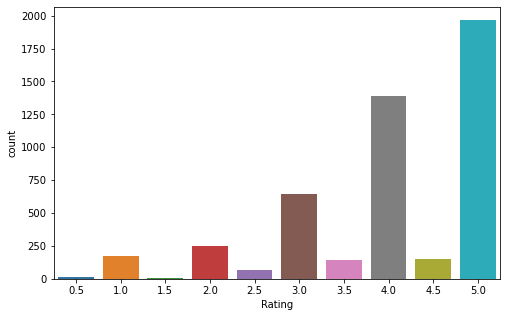

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Rating')

In [24]:
df1 = df.copy()

In [25]:
df1['Rating'] = df1['Rating'].replace(0.5,1)
df1['Rating'] = df1['Rating'].replace(1.5,2)
df1['Rating'] = df1['Rating'].replace(2.5,3)
df1['Rating'] = df1['Rating'].replace(3.5,4)
df1['Rating'] = df1['Rating'].replace(4.5,5)

In [26]:
df1.head()

Title                    Heading              Reviewer       Date  \
0   Fixed Deposit  comfortable fixed deposit                  BAJI 2019-07-15   
1  Saving Account         beneficial account                MADAKE 2019-07-15   
2     Credit Card            good experience  VIJAY LIMBAJI MADAKE 2019-07-15   
3  Saving Account                       good                  KHAN 2019-07-14   
4  Saving Account                       good                    LU 2019-07-13   

                                              Review              Bank  Rating  
0  I have opt for five years of fixed deposit wit...  Corporation-Bank     4.0  
1  Corporation bank has less charges for online b...  Corporation-Bank     5.0  
2  Past 15 years I have been using Corporation ba...  Corporation-Bank     5.0  
3  I have  a savings account in corporation bank....  Corporation-Bank     3.0  
4  From last 3 years i have an savings account in...  Corporation-Bank     4.0

<AxesSubplot:xlabel='Rating', ylabel='count'>

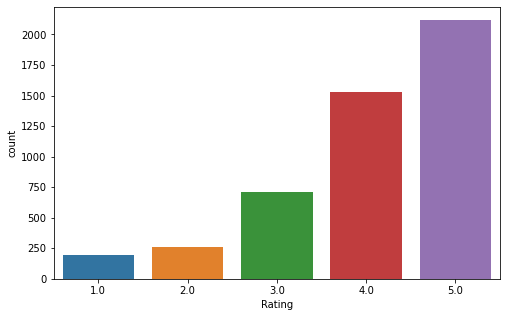

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(data=df1, x='Rating')

In [28]:
pd.crosstab(df1['Rating'],df1['Bank'])

Bank    Bank-Of-India  Capital-First  Central-Bank-Of-India  Corporation-Bank  \
Rating                                                                          
1.0                29             49                     12                44   
2.0                60             56                     33                49   
3.0               171            126                    104               173   
4.0               313            322                    214               341   
5.0               427            447                    304               357   

Bank    Kotak  
Rating         
1.0        58  
2.0        60  
3.0       138  
4.0       342  
5.0       584

In [29]:
pd.crosstab(df1['Title'],df1['Rating'])

Rating             1.0  2.0  3.0  4.0  5.0
Title                                     
All Products         0    0    0    0    4
Car Loan            22   22   44  112  132
Credit Card         31   46  107  234  438
Current Account      0    1   14   10   33
Education Loan       4    3    3   20   17
Fixed Deposit        3    0    7   18   20
Gold Loan            0    0    0    2    3
Home Loan            4    8   29   56   82
Other Loan          18   21   44  167  276
Personal Loan       38   37   82  169  237
Recurring Deposit    0    0    4    8   13
Saving Account      72  120  377  727  850
Two Wheeler Loan     0    0    1    9   14

In [30]:
pd.crosstab(df1['Title'],df1['Bank'])

Bank               Bank-Of-India  Capital-First  Central-Bank-Of-India  \
Title                                                                    
All Products                   1              2                      0   
Car Loan                      21            244                     22   
Credit Card                   47              0                     34   
Current Account               25              0                     13   
Education Loan                16              0                     19   
Fixed Deposit                  6              0                     23   
Gold Loan                      0              0                      5   
Home Loan                     36              0                     58   
Other Loan                    23            478                     12   
Personal Loan                 41            276                     27   
Recurring Deposit              4              0                     12   
Saving Account               772              0                    433   
Two Wheeler Loan               8              0                      9   

Bank               Corporation-Bank  Kotak  
Title                                       
All Products                      1      0  
Car Loan                         33     12  
Credit Card                      41    734  
Current Account                  20      0  
Education Loan                   12      0  
Fixed Deposit                    18      1  
Gold Loan                         0      0  
Home Loan                        82      3  
Other Loan                       13      0  
Personal Loan                    35    184  
Recurring Deposit                 7      2  
Saving Account                  695    246  
Two Wheeler Loan                  7      0

# Text Analysis

In [31]:
def text_clean_1(text):
  text = text.lower()                     #converting upper-case to lower-case
  text = re.sub('\[.*?\]','',text)        #Removing square brackets
  text = re.sub('[%s]' % re.escape(string.punctuation),'',text)   #Removes numbers
  text = re.sub('\w*\d\w*','',text)       #Punctuation
  text = re.sub('[''""...]','',text)      #Remove Quotes
  text = re.sub('\n','',text)             #Remove '\n' 
  return text

cleaned_1 = lambda x: text_clean_1(x)

In [32]:
df1['cleaned_review'] = pd.DataFrame(df1['Review'].apply(cleaned_1))

In [33]:
df1['Heading'] = pd.DataFrame(df1['Heading'].apply(cleaned_1))

In [34]:
df1.head()

Title                    Heading              Reviewer       Date  \
0   Fixed Deposit  comfortable fixed deposit                  BAJI 2019-07-15   
1  Saving Account         beneficial account                MADAKE 2019-07-15   
2     Credit Card            good experience  VIJAY LIMBAJI MADAKE 2019-07-15   
3  Saving Account                       good                  KHAN 2019-07-14   
4  Saving Account                       good                    LU 2019-07-13   

                                              Review              Bank  \
0  I have opt for five years of fixed deposit wit...  Corporation-Bank   
1  Corporation bank has less charges for online b...  Corporation-Bank   
2  Past 15 years I have been using Corporation ba...  Corporation-Bank   
3  I have  a savings account in corporation bank....  Corporation-Bank   
4  From last 3 years i have an savings account in...  Corporation-Bank   

   Rating                                     cleaned_review  
0     4.0  i have opt for five years of fixed deposit wit...  
1     5.0  corporation bank has less charges for online b...  
2     5.0  past  years i have been using corporation bank...  
3     3.0  i have  a savings account in corporation bank ...  
4     4.0  from last  years i have an savings account in ...

In [35]:
corpus_review = " ".join(df1['cleaned_review'])
corpus_heading = " ".join(df1['Heading'])

In [36]:
tokens_review = re.findall("\w+",corpus_review)
tokens_heading = re.findall("\w+",corpus_heading)

In [37]:
tokens_no_stopwords_review = [x for x in tokens_review if x not in STOPWORDS]
tokens_no_stopwords_heading = [x for x in tokens_heading if x not in STOPWORDS]

In [38]:
wc = WordCloud(width=800, height=600, stopwords=STOPWORDS)

Text(0.5, 1.0, 'Most Frequent words in Headings')

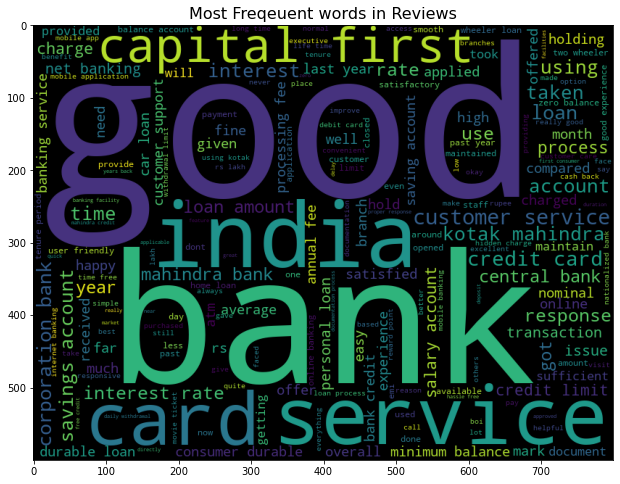

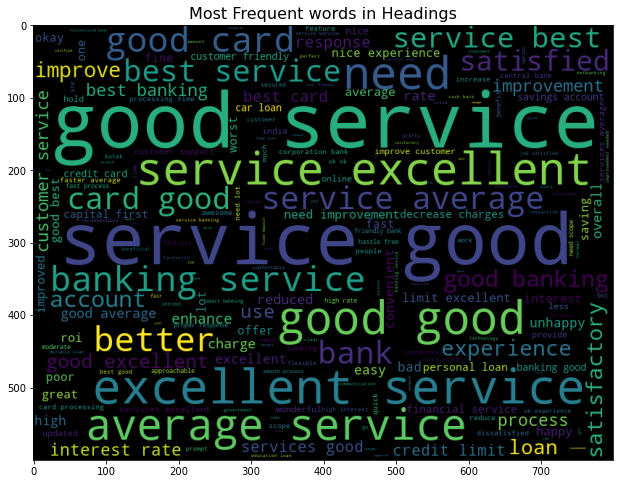

In [39]:
plt.figure(figsize=(12,8))
plt.imshow(wc.generate_from_text(corpus_review))
plt.title('Most Freqeuent words in Reviews', fontsize = 16)

plt.figure(figsize=(12,8))
plt.imshow(wc.generate_from_text(corpus_heading))
plt.title("Most Frequent words in Headings", fontsize = 16)

In [40]:
from collections import Counter

In [41]:
C = Counter(tokens_no_stopwords_review)
# C.most_common(20)

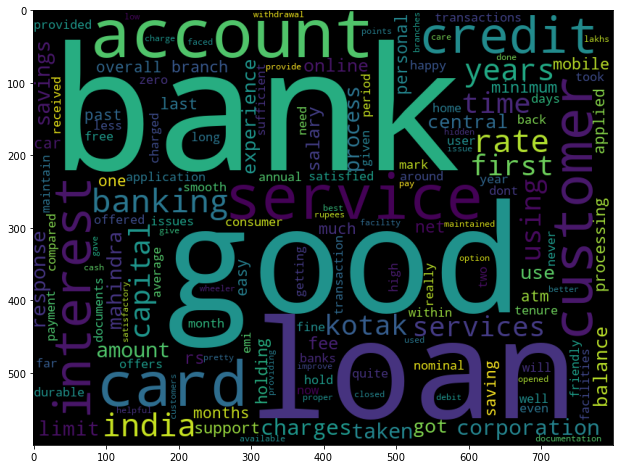

In [42]:
plt.figure(figsize=(12,8))
most_fre_words = {k:v for k,v in C.most_common(150)}
plt.imshow(wc.generate_from_frequencies(most_fre_words))

**Most Frequent Words in the Reviews for different Ratings**

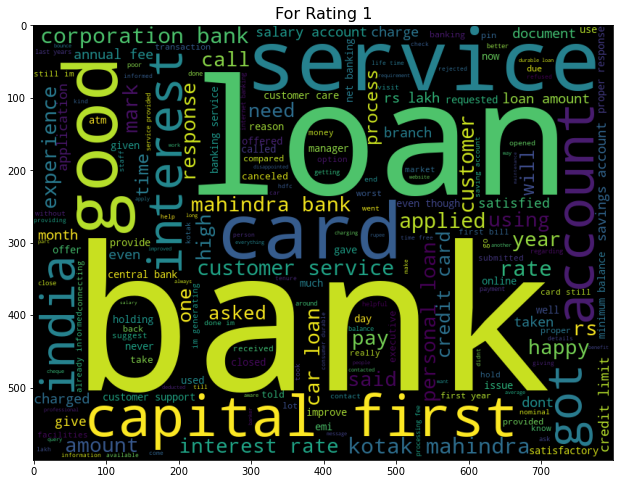

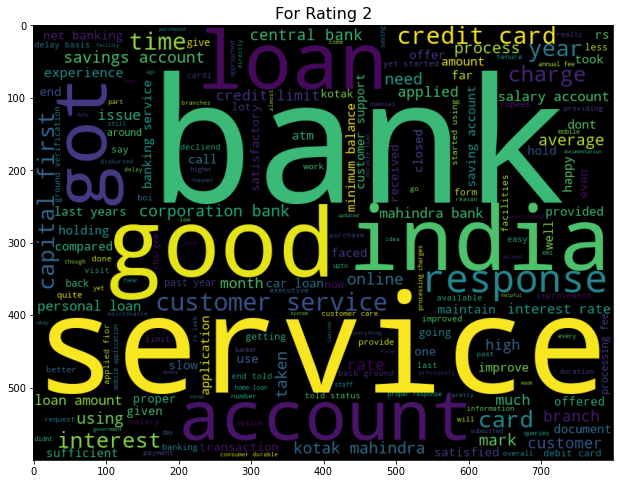

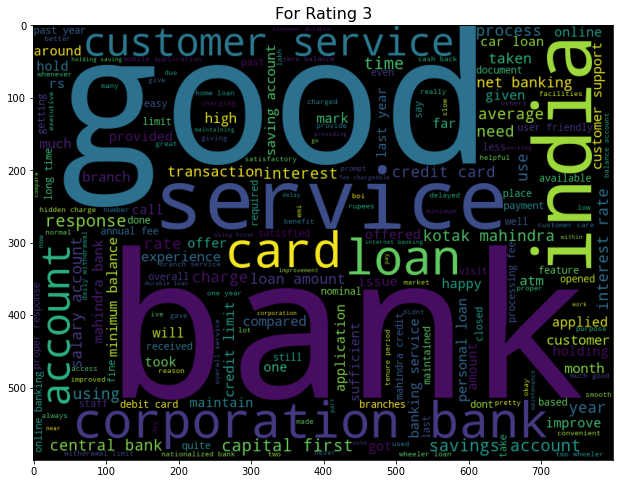

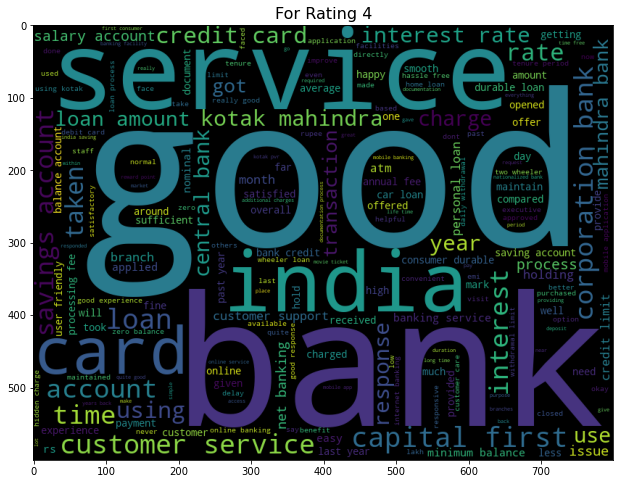

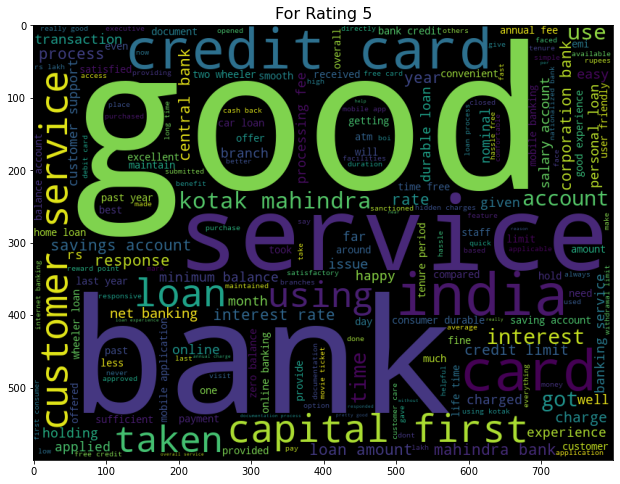

In [43]:
for i in range(1,6):
    plt.figure(figsize=(12,8))
    plt.imshow(wc.generate(" ".join(df1[df1['Rating']==i].cleaned_review)))
    plt.title("For Rating {}".format(i), fontsize = 16)

**Most Frequent Words in the Reviews for different Banks**

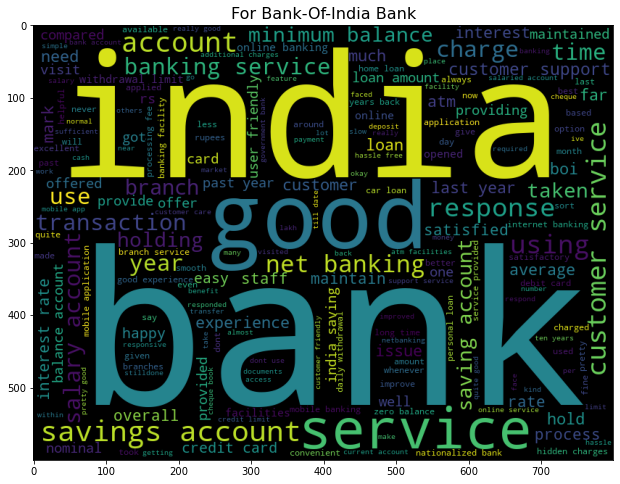

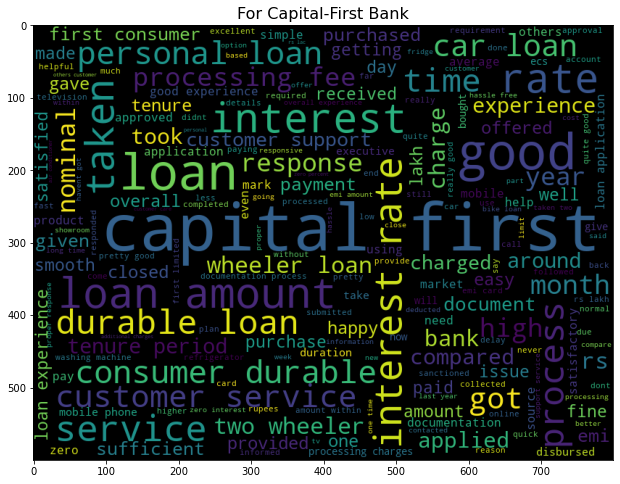

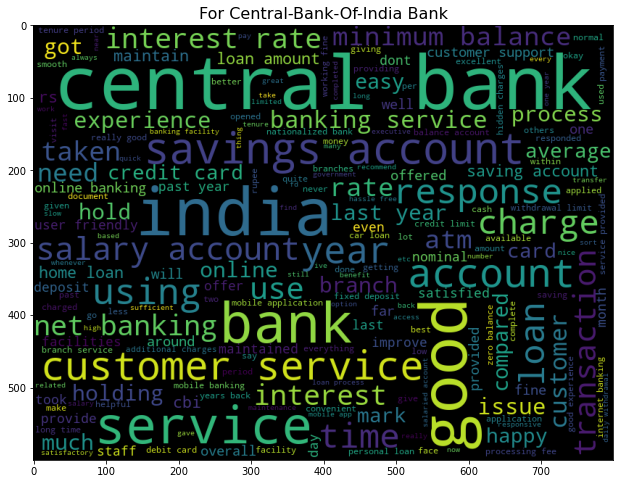

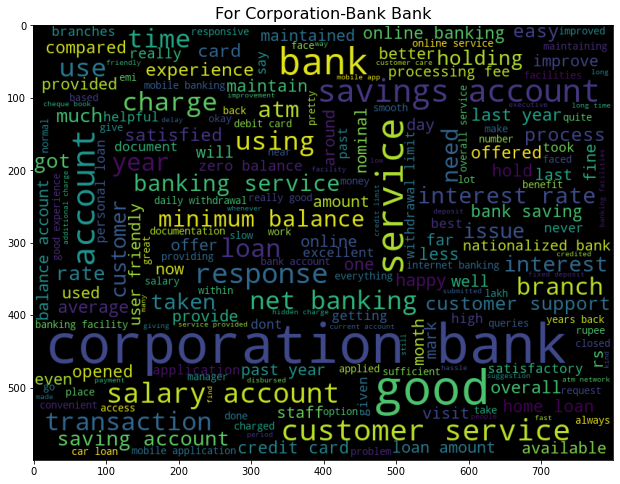

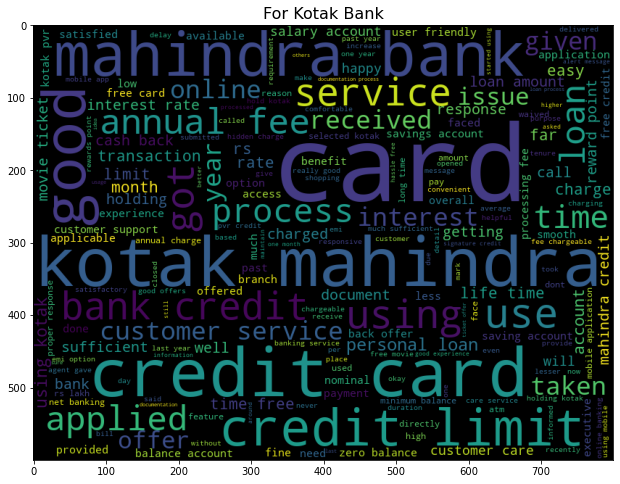

In [44]:
for i in ['Bank-Of-India', 'Capital-First', 'Central-Bank-Of-India', 'Corporation-Bank', 'Kotak']:
    plt.figure(figsize=(12,8))
    plt.imshow(wc.generate(" ".join(df1[df1['Bank']==i].cleaned_review)))
    plt.title("For {} Bank".format(i), fontsize = 16)

**Most Frequent Words in the Reviews for different Titles**

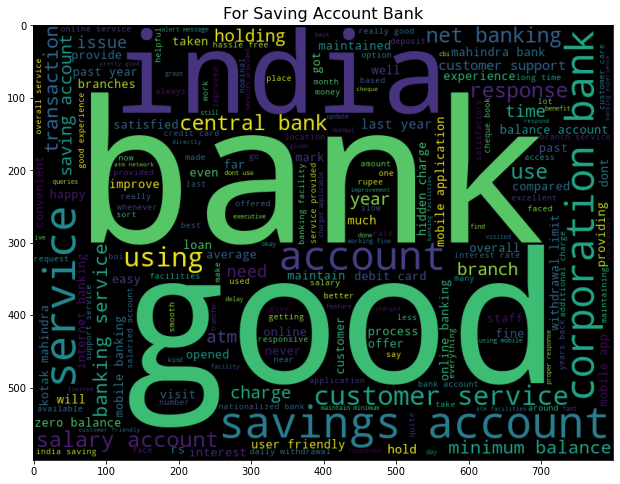

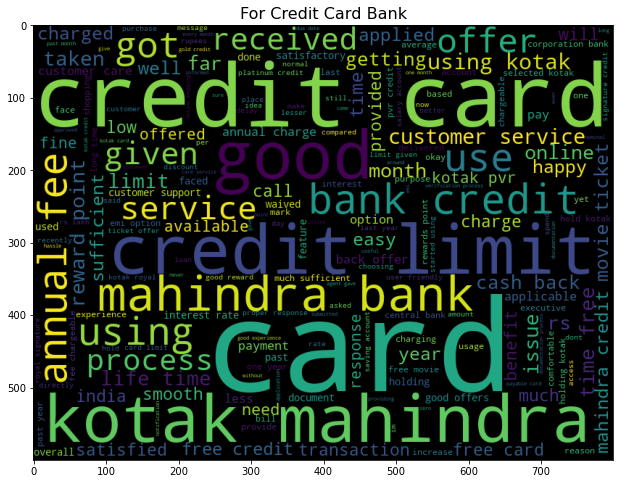

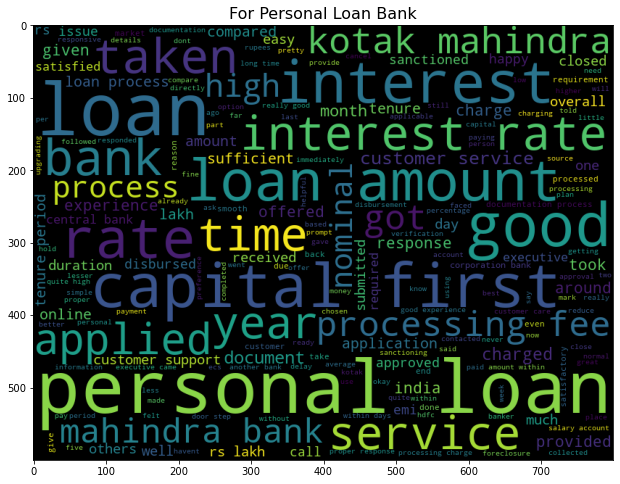

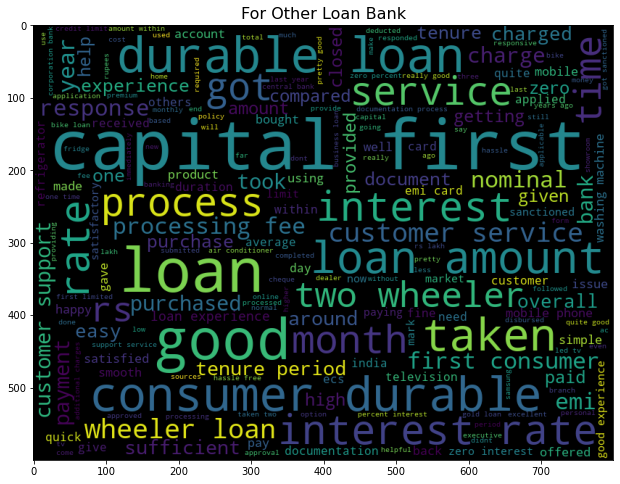

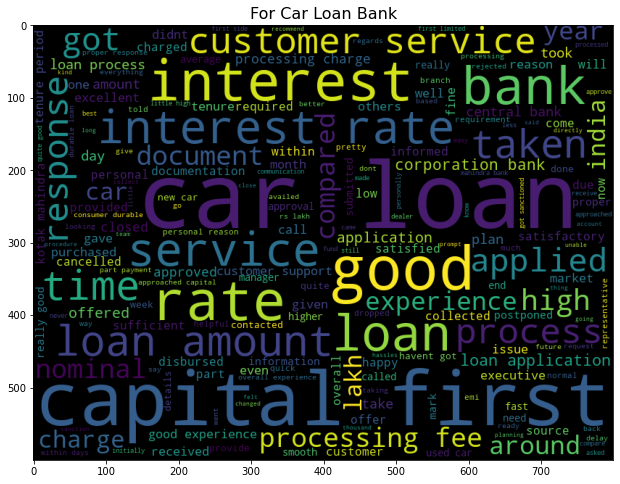

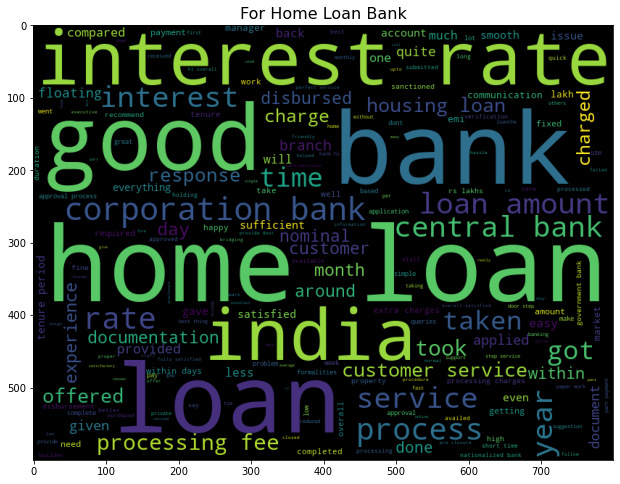

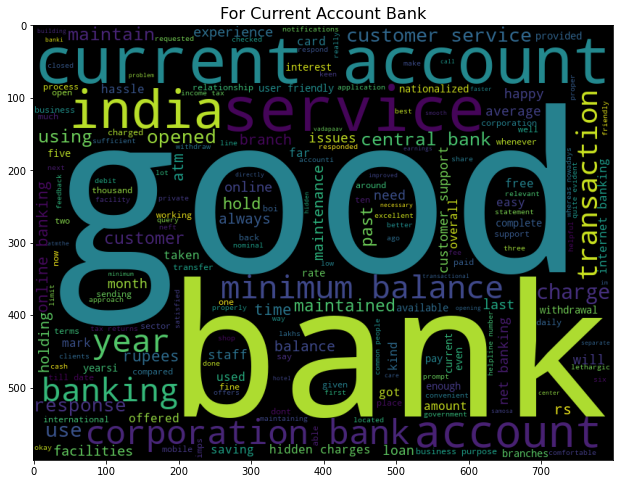

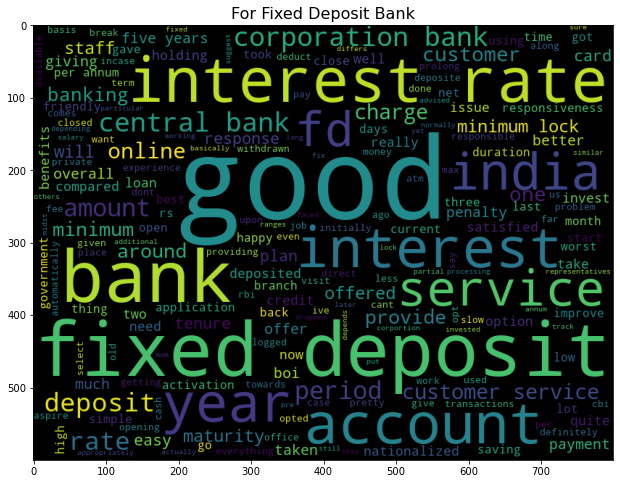

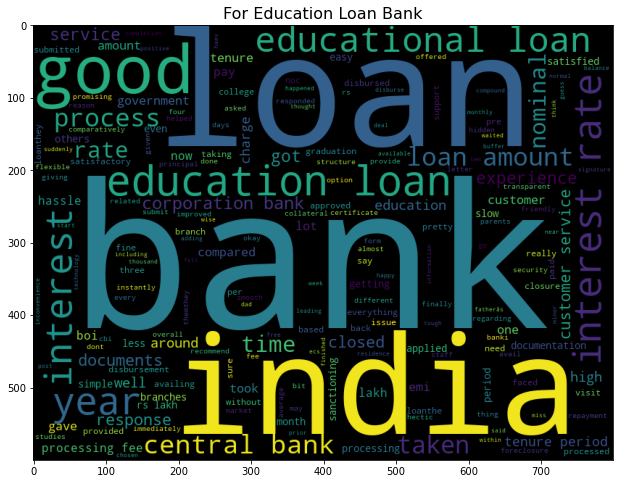

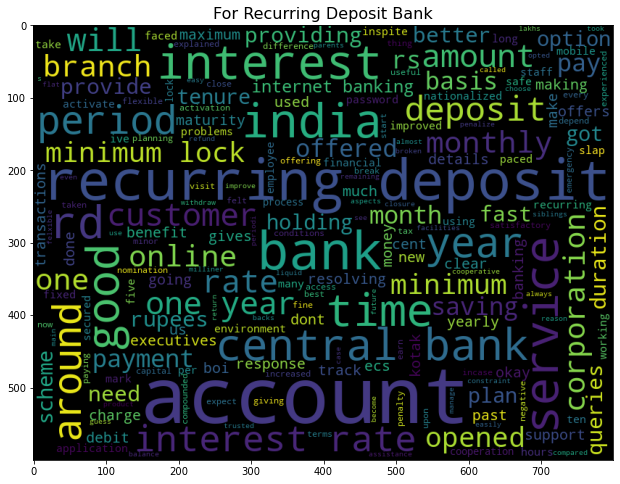

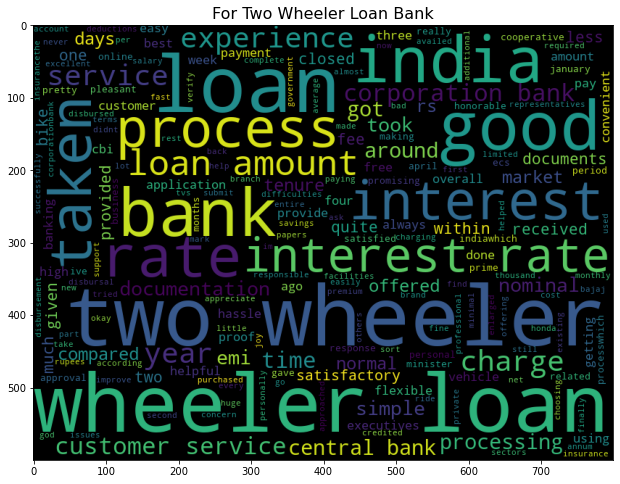

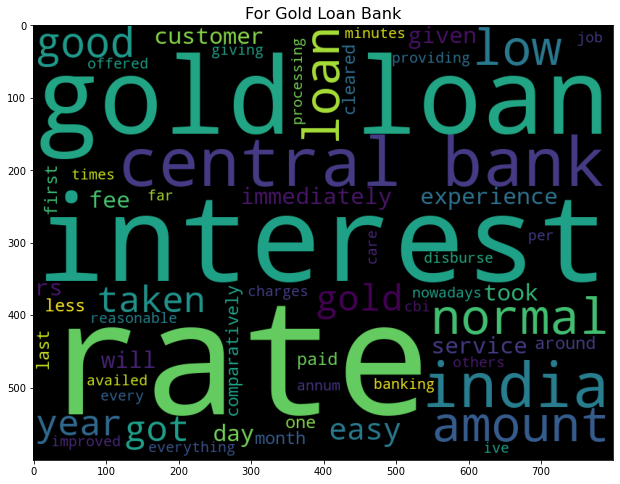

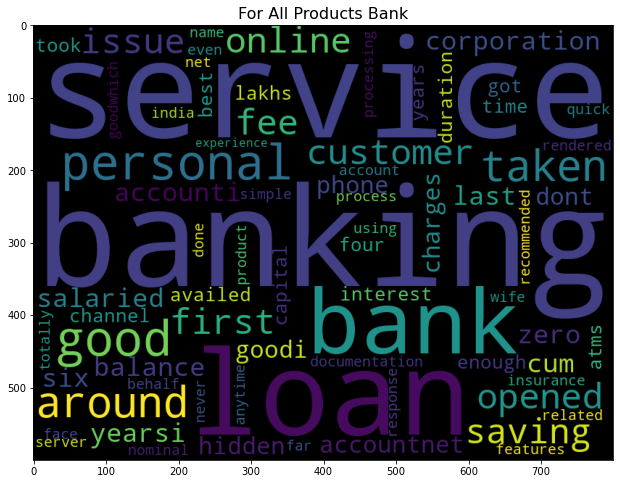

In [46]:
for i in ['Saving Account','Credit Card','Personal Loan','Other Loan', 
          'Car Loan', 'Home Loan','Current Account','Fixed Deposit',
          'Education Loan','Recurring Deposit',
          'Two Wheeler Loan','Gold Loan','All Products']:
    plt.figure(figsize=(12,8))
    plt.imshow(wc.generate(" ".join(df1[df1['Title']==i].cleaned_review)))
    plt.title("For {} Bank".format(i), fontsize = 16)

In [47]:
df1.columns

Index(['Title', 'Heading', 'Reviewer', 'Date', 'Review', 'Bank', 'Rating',
       'cleaned_review'],
      dtype='object')

In [48]:
df_new = df1.copy()
df_new = df_new.drop(['Title', 'Heading', 'Reviewer', 'Date', 'Review', 'Bank'],axis =1)

In [49]:
df_new.head()

Rating                                     cleaned_review
0     4.0  i have opt for five years of fixed deposit wit...
1     5.0  corporation bank has less charges for online b...
2     5.0  past  years i have been using corporation bank...
3     3.0  i have  a savings account in corporation bank ...
4     4.0  from last  years i have an savings account in ...

# MODELLING

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tfidf = TfidfVectorizer(stop_words=STOPWORDS,ngram_range=(1,2),
                        max_df=0.7, min_df = 10,
                        token_pattern="[a-z']+", 
                        max_features=200)  # first with max_features 200 and then change it to 500

In [53]:
X=df_new['cleaned_review']
y=df_new.Rating

In [54]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = True, random_state = 8)

In [55]:
X_train = tfidf.fit_transform(X_train)

In [56]:
X_test = tfidf.fit_transform(X_test)

## 1st Method

**Taking all 5 Ratings seperately**

### 1 . Logistic Regression

In [57]:
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [58]:
# Instantiating logistic regression classifier
logreg = LogisticRegression()

In [59]:
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5,n_jobs=-1)

In [60]:
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [61]:
logreg_cv.best_params_

{'C': 3.727593720314938}

In [62]:
logreg = LogisticRegression(**logreg_cv.best_params_)

In [63]:
logreg.fit(X_train,y_train)

LogisticRegression(C=3.727593720314938)

In [64]:
y_pred = logreg.predict(X_test)

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        29
         2.0       0.23      0.06      0.09        53
         3.0       0.14      0.17      0.15       133
         4.0       0.34      0.27      0.30       316
         5.0       0.49      0.59      0.53       432

    accuracy                           0.38       963
   macro avg       0.24      0.22      0.22       963
weighted avg       0.36      0.38      0.36       963



In [66]:
lr_1 = accuracy_score(y_test,y_pred)

### 2 . KNN Classifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
leaf_size = list(range(1,30))
n_neighbors = list(range(1,20))
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [69]:
knn = KNeighborsClassifier()

In [70]:
clf = GridSearchCV(knn, hyperparameters, cv=5, n_jobs=-1)

In [71]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'p': [1, 2]})

In [72]:
clf.best_params_

{'leaf_size': 1, 'n_neighbors': 9, 'p': 2}

In [73]:
knn = KNeighborsClassifier(**clf.best_params_)

In [74]:
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=9)

In [75]:
y_pred = knn.predict(X_test)

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        29
         2.0       0.00      0.00      0.00        53
         3.0       0.22      0.08      0.12       133
         4.0       0.28      0.11      0.16       316
         5.0       0.44      0.80      0.57       432

    accuracy                           0.41       963
   macro avg       0.19      0.20      0.17       963
weighted avg       0.32      0.41      0.32       963



In [77]:
knn_1 = accuracy_score(y_test,y_pred)

### 3 . Decision Tree Classifier

In [78]:
dtree = DecisionTreeClassifier()

In [79]:
dtree_grid = {'criterion':['gini','entropy'],
              'max_depth': [int(x) for x in np.linspace(10, 90, num = 9)],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'splitter' : ["best", "random"]
             }

In [80]:
dtree_grid = GridSearchCV(estimator=dtree, 
                          param_grid=dtree_grid, 
                          cv=5, 
                          n_jobs=-1,
                          scoring="accuracy")

In [81]:
dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [82]:
dtree_grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'random'}

In [83]:
dtree = DecisionTreeClassifier(**dtree_grid.best_params_)

In [84]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5, splitter='random')

In [85]:
y_pred = dtree.predict(X_test)

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        29
         2.0       0.33      0.02      0.04        53
         3.0       0.16      0.12      0.14       133
         4.0       0.27      0.05      0.09       316
         5.0       0.47      0.85      0.60       432

    accuracy                           0.42       963
   macro avg       0.24      0.21      0.17       963
weighted avg       0.34      0.42      0.32       963



In [87]:
dtc_1 = accuracy_score(y_test,y_pred)

### 4 . Random Forest

In [88]:
rf = RandomForestClassifier()

In [89]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(10, 90, num = 9)]
max_depth.append(None)

min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [90]:
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [91]:
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

In [92]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [93]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20,
 'criterion': 'entropy',
 'bootstrap': True}

In [94]:
rf = RandomForestClassifier(**rf_random.best_params_)

In [95]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=1000)

In [96]:
y_pred = rf.predict(X_test)

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        29
         2.0       0.00      0.00      0.00        53
         3.0       0.23      0.08      0.11       133
         4.0       0.45      0.07      0.13       316
         5.0       0.46      0.93      0.62       432

    accuracy                           0.45       963
   macro avg       0.23      0.22      0.17       963
weighted avg       0.39      0.45      0.33       963



In [98]:
rf_1 = accuracy_score(y_test,y_pred)

### 5 . SVC

In [99]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [100]:
grid = GridSearchCV(SVC(), 
                    param_grid, 
                    refit = True, 
                    verbose = 3,
                    n_jobs=-1)

In [101]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [102]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [103]:
svc = SVC(**grid.best_params_)

In [104]:
svc.fit(X_train,y_train)

SVC(C=1, gamma=1)

In [105]:
y_pred = svc.predict(X_test)

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        29
         2.0       0.00      0.00      0.00        53
         3.0       0.25      0.04      0.07       133
         4.0       0.35      0.11      0.17       316
         5.0       0.46      0.89      0.60       432

    accuracy                           0.44       963
   macro avg       0.21      0.21      0.17       963
weighted avg       0.36      0.44      0.34       963



In [107]:
svc_1 = accuracy_score(y_test,y_pred)

### 6 . TPOT Classifier

In [108]:
from tpot import TPOTClassifier

In [109]:
tpot_config = {'sklearn.naive_bayes.GaussianNB': {},
               'sklearn.naive_bayes.BernoulliNB': {'alpha': [1e-3, 1e-2, 1e-1, 1., 10., 100.],
                                                   'fit_prior': [True, False]
                                                  },
               'sklearn.naive_bayes.MultinomialNB': {'alpha': [1e-3, 1e-2, 1e-1, 1., 10., 100.],
                                                     'fit_prior': [True, False]
                                                    },
               'sklearn.ensemble.RandomForestClassifier':{'criterion': ['entropy', 'gini'],
                                                          'max_depth': [int(x) for x in np.linspace(10, 90, num = 9)],
                                                          'max_features': ['auto'],
                                                          'min_samples_leaf': [1,2,4,12],
                                                          'min_samples_split': [2,5, 10],
                                                          'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
                                                         }              
              }

In [110]:
tpot = TPOTClassifier(generations=5, 
                      population_size=20, 
                      verbosity=2,
                      config_dict=tpot_config,
                      n_jobs=-1,
                      cv = 5,
                      early_stop = 12,
                      scoring = "accuracy"
                     )

In [111]:
tpot.fit(X_train,y_train) 

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.5023376623376623

Generation 2 - Current best internal CV score: 0.5023376623376623

Generation 3 - Current best internal CV score: 0.5051948051948052

Generation 4 - Current best internal CV score: 0.5051948051948052

Generation 5 - Current best internal CV score: 0.5051948051948052

Best pipeline: RandomForestClassifier(input_matrix, criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      20,
                                                                                      30,
                                                                                      40,
                                                                                      50,
                                                                                      60,
                                                                                      70,
                                                                                      80,
                                                                                      90

In [112]:
tpot_1 = tpot.score(X_test, y_test)

**Creating a dataframe for all the models used**

In [186]:
dict = {'Logistic Regression' : lr_1,
        'KNN Classifier': knn_1 ,
        'Decision Tree Classifier':dtc_1,
        'Random Forest Classifier': rf_1,
        'SVC Classifier': svc_1,
        'TPOT Classifier': tpot_1}

In [187]:
dff_1 = pd.DataFrame(index= dict.keys(), data = dict.values(), columns=['Accuracy Scores']).sort_values(by=['Accuracy Scores'],ascending= False)

In [188]:
dff_1

Accuracy Scores
Random Forest Classifier         0.450675
SVC Classifier                   0.441329
TPOT Classifier                  0.438214
Decision Tree Classifier         0.415369
KNN Classifier                   0.406023
Logistic Regression              0.382139

**Therefore Random Forest Classifier gives the best accuracy score of 0.45 for the multiclass classsification**

## 2nd Method
**Converting Ratings into Positive and Negative Ratings only**

In [116]:
df_new.head()

Rating                                     cleaned_review
0     4.0  i have opt for five years of fixed deposit wit...
1     5.0  corporation bank has less charges for online b...
2     5.0  past  years i have been using corporation bank...
3     3.0  i have  a savings account in corporation bank ...
4     4.0  from last  years i have an savings account in ...

**Removing the neutral Rating as it will not help us in the creating the model**

In [117]:
df_final = df_new[df_new['Rating'] != 3]

**Converting Rating 4 & 5 to 1, and Rating 1 & 2 to 0, meaning 0 represents negative ratings and 1 represent positive ratings.** 

In [118]:
df_final['Rating'] = np.where(df_final['Rating']>3,1,0)

In [119]:
df_final.head()

Rating                                     cleaned_review
0       1  i have opt for five years of fixed deposit wit...
1       1  corporation bank has less charges for online b...
2       1  past  years i have been using corporation bank...
4       1  from last  years i have an savings account in ...
5       1  i am holding a savings account  in corporation...

In [120]:
df_final['Rating'].value_counts()

1    3651
0     450
Name: Rating, dtype: int64

In [121]:
X = df_final['cleaned_review']
y = df_final['Rating']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [123]:
X_train = tfidf.fit_transform(X_train)

In [124]:
X_test = tfidf.fit_transform(X_test)

### 1 . Logistic Regression

In [125]:
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [126]:
# Instantiating logistic regression classifier
logreg = LogisticRegression()

In [127]:
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, 
                         param_grid, 
                         cv = 5,
                         n_jobs = -1)

In [128]:
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [129]:
logreg_cv.best_params_

{'C': 31.622776601683793}

In [130]:
logreg = LogisticRegression(**logreg_cv.best_params_)

In [131]:
logreg.fit(X_train,y_train)

LogisticRegression(C=31.622776601683793)

In [132]:
y_pred = logreg.predict(X_test)

In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.06      0.02      0.03        90
           1       0.89      0.96      0.92       731

    accuracy                           0.85       821
   macro avg       0.47      0.49      0.48       821
weighted avg       0.80      0.85      0.82       821



In [134]:
lr_2 = accuracy_score(y_test,y_pred)

### 2 . KNN Classifier

In [135]:
from sklearn.neighbors import KNeighborsClassifier

In [138]:
hyperparameters = {'leaf_size':list(range(1,30)),
                   'n_neighbors': list(range(1,20)),
                   'p':[1,2]}

In [139]:
knn = KNeighborsClassifier()

In [140]:
clf = GridSearchCV(knn, hyperparameters, cv=5, n_jobs=-1)

In [141]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'p': [1, 2]})

In [142]:
clf.best_params_

{'leaf_size': 1, 'n_neighbors': 11, 'p': 2}

In [143]:
knn = KNeighborsClassifier(**clf.best_params_)

In [144]:
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=11)

In [145]:
y_pred = knn.predict(X_test)

In [146]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.40      0.07      0.11        90
           1       0.90      0.99      0.94       731

    accuracy                           0.89       821
   macro avg       0.65      0.53      0.53       821
weighted avg       0.84      0.89      0.85       821



In [147]:
knn_2 = accuracy_score(y_test,y_pred)

### 3 . Decision Tree Classifier

In [148]:
dtree = DecisionTreeClassifier()

In [149]:
dtree_grid = {'criterion':['gini','entropy'],
              'max_depth': [int(x) for x in np.linspace(10, 90, num = 9)],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'splitter' : ["best", "random"]
             }

In [150]:
dtree_grid = GridSearchCV(estimator=dtree, 
                          param_grid=dtree_grid, 
                          cv=5, 
                          n_jobs=-1,
                          scoring="accuracy")

In [151]:
dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [152]:
dtree_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [153]:
dtree = DecisionTreeClassifier(**dtree_grid.best_params_)

In [154]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       splitter='random')

In [155]:
y_pred = dtree.predict(X_test)

In [156]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.09      0.04      0.06        90
           1       0.89      0.94      0.92       731

    accuracy                           0.84       821
   macro avg       0.49      0.49      0.49       821
weighted avg       0.80      0.84      0.82       821



In [157]:
dtc_2 = accuracy_score(y_test,y_pred)

### 4 . Random Forest

In [158]:
rf = RandomForestClassifier()

In [159]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(10, 90, num = 9)]
max_depth.append(None)

min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [160]:
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [161]:
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

In [162]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [163]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 30,
 'criterion': 'entropy',
 'bootstrap': False}

In [164]:
rf = RandomForestClassifier(**rf_random.best_params_)

In [165]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       n_estimators=800)

In [166]:
y_pred = rf.predict(X_test)

In [167]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.01      0.02        90
           1       0.89      1.00      0.94       731

    accuracy                           0.89       821
   macro avg       0.57      0.50      0.48       821
weighted avg       0.82      0.89      0.84       821



In [168]:
rf_2 = accuracy_score(y_test,y_pred)

### 5 . SVC

In [169]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [170]:
grid = GridSearchCV(SVC(), 
                    param_grid = param_grid, 
                    refit = True, 
                    verbose = 3 , 
                    n_jobs=-1)

In [171]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [172]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [173]:
svc = SVC(**grid.best_params_)

In [174]:
svc.fit(X_train,y_train)

SVC(C=10, gamma=1)

In [175]:
y_pred = svc.predict(X_test)

In [176]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.08      0.01      0.02        90
           1       0.89      0.98      0.94       731

    accuracy                           0.88       821
   macro avg       0.49      0.50      0.48       821
weighted avg       0.80      0.88      0.83       821



In [177]:
svc_2 = accuracy_score(y_test,y_pred)

### 6 . TPOT Classifier

In [178]:
from tpot import TPOTClassifier

In [179]:
tpot_config = {'sklearn.naive_bayes.GaussianNB': {},
               'sklearn.naive_bayes.BernoulliNB': {'alpha': [1e-3, 1e-2, 1e-1, 1., 10., 100.],
                                                   'fit_prior': [True, False]
                                                  },
               'sklearn.naive_bayes.MultinomialNB': {'alpha': [1e-3, 1e-2, 1e-1, 1., 10., 100.],
                                                     'fit_prior': [True, False]
                                                    },
               'sklearn.ensemble.RandomForestClassifier':{'criterion': ['entropy', 'gini'],
                                                          'max_depth': [int(x) for x in np.linspace(10, 90, num = 9)],
                                                          'max_features': ['auto'],
                                                          'min_samples_leaf': [1,2,4,12],
                                                          'min_samples_split': [2,5, 10],
                                                          'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
                                                         }              
              }

In [180]:
tpot = TPOTClassifier(generations=5, 
                      population_size=20, 
                      verbosity=2,
                      config_dict=tpot_config,
                      n_jobs=-1,
                      cv = 5,
                      early_stop = 12,
                      scoring = "accuracy"
                     )

In [181]:
tpot.fit(X_train,y_train) 

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.899390243902439

Generation 2 - Current best internal CV score: 0.9009146341463415

Generation 3 - Current best internal CV score: 0.9015243902439025

Generation 4 - Current best internal CV score: 0.9021341463414634

Generation 5 - Current best internal CV score: 0.9021341463414634

Best pipeline: RandomForestClassifier(CombineDFs(input_matrix, input_matrix), criterion=entropy, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      20,
                                                                                      30,
                                                                                      40,
                                                                                      50,
                                                                                      60,
                                                                                      70,
                                                                                      80,
                                                                                      90

In [182]:
tpot_2 = tpot.score(X_test, y_test)

**Creating a dataframe for all the models used**

In [183]:
dict = {'Logistic Regression' : lr_2,
        'KNN Classifier': knn_2,
        'Decision Tree Classifier':dtc_2,
        'Random Forest Classifier': rf_2,
        'SVC Classifier': svc_2,
        'TPOT Classifier': tpot_2}

In [184]:
dff_2 = pd.DataFrame(index= dict.keys(), data = dict.values(), columns=['Accuracy Scores']).sort_values(by=['Accuracy Scores'],ascending= False)

In [185]:
dff_2

Accuracy Scores
TPOT Classifier                  0.889160
Random Forest Classifier         0.887942
KNN Classifier                   0.886724
SVC Classifier                   0.878197
Logistic Regression              0.853837
Decision Tree Classifier         0.844093

**Therefore TPOT Classifier gives the best accuracy score of 0.889 for the Binary class classsification**

## REFERENCES:

***Various websites like AnalyticsVidhya.com, GeekforGeeks.com, medium.com, TowardsDataScience.com, etc. and Youtube channels***